In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import metrics, linear_model
from math import ceil

In [22]:
bin_train = np.genfromtxt('bindigit_trn.csv',delimiter=',',)
target_train = np.genfromtxt('targetdigit_trn.csv',delimiter=',',)
bin_test = np.genfromtxt('bindigit_tst.csv',delimiter=',',)
target_test = np.genfromtxt('targetdigit_tst.csv',delimiter=',',)

In [23]:
class RBM(BernoulliRBM):
    def reconstruct(self, X):
        inner = np.dot(np.dot(self.components_.T, self.components_),X.T).T
        recon = inner / inner.max(axis=0)
        return recon

In [24]:
def calculate_error(data, recon_data):
    return np.average(np.absolute(data-recon_data))

In [25]:
def report_RBM(hidden_dim, learning_rate, batch_size = 64, iterations = 10):
    
    rbm = RBM(n_components = hidden_dim, batch_size = batch_size, learning_rate = learning_rate,
                  n_iter = iterations, verbose = False, random_state = 0)
    errors = []
    for i in range(iterations):
        rbm.n_iter = i
        rbm.fit(bin_train)
        recon = rbm.reconstruct(bin_test)
        errors.append(calculate_error(bin_test, recon))
        print("finished iteration #{}".format(i+1))
    plt.plot(errors)
    plt.title("Testing error Vs iterations")
    plt.show()
    plt.figure(figsize = (20,10))
    for j in range(1,10):
        index = np.where(target_test==j)[0][0]
        
        # Plot original
        plt.subplot(10, 2, j*2-1)
        plt.imshow(bin_test[index,:].reshape((28, 28)), cmap=plt.cm.gray_r,
           interpolation='nearest')
        plt.gray()
        plt.xticks(())
        plt.yticks(())
        
        plt.subplot(10, 2, j*2)
        #Plot reconstruction
        plt.imshow(rbm.reconstruct(bin_test[index,:]).reshape((28, 28)), cmap=plt.cm.gray_r,
           interpolation='nearest')
        plt.gray()
        plt.xticks(())
        plt.yticks(())
    plt.suptitle(" ")
    plt.subplots_adjust(left = 0.125, right = 0.175, wspace = 0, hspace = 0)
    
    plt.figure(figsize=(10.2, 10))
    for i, comp in enumerate(rbm.components_):
        plt.subplot(10, ceil(hidden_dim/10), i + 1)
        plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.gray()
        plt.xticks(())
        plt.yticks(())
    plt.suptitle('{} components extracted by RBM'.format(hidden_dim), fontsize=16)
    plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

finished iteration #1
finished iteration #2
finished iteration #3
finished iteration #4
finished iteration #5
finished iteration #6
finished iteration #7
finished iteration #8
finished iteration #9
finished iteration #10


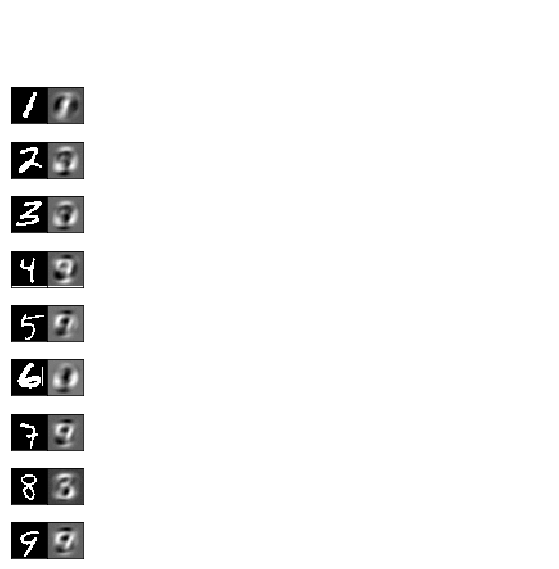

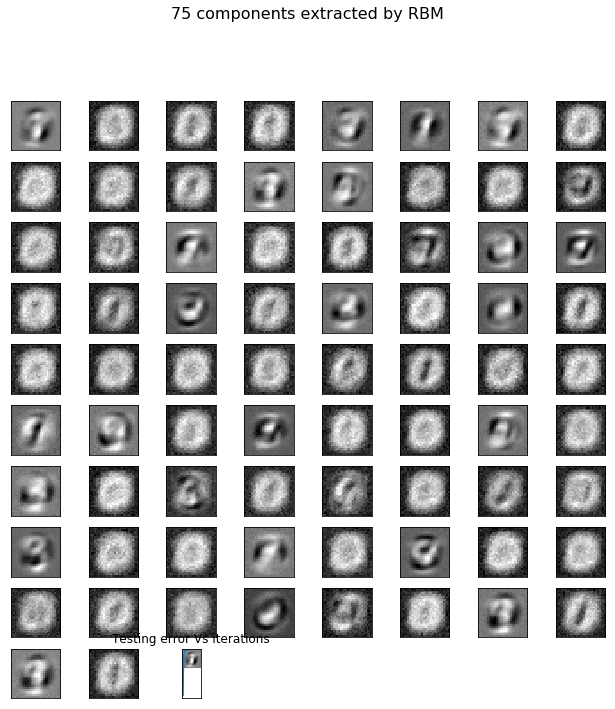

In [26]:
recon = report_RBM(hidden_dim = 50, learning_rate = 0.01)

finished iteration #1
finished iteration #2
finished iteration #3
finished iteration #4
finished iteration #5
finished iteration #6
finished iteration #7
finished iteration #8
finished iteration #9
finished iteration #10


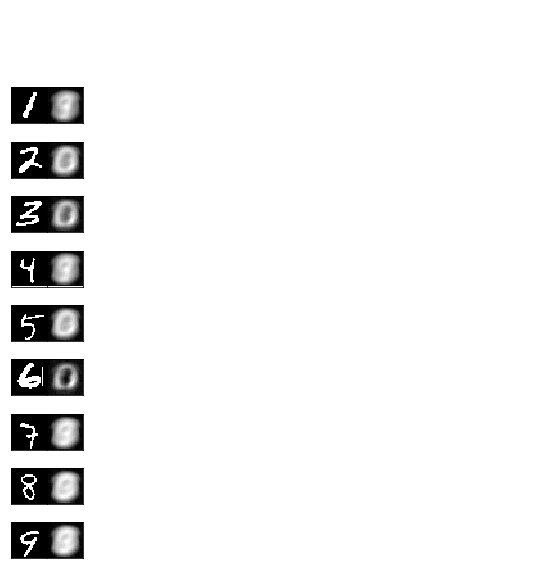

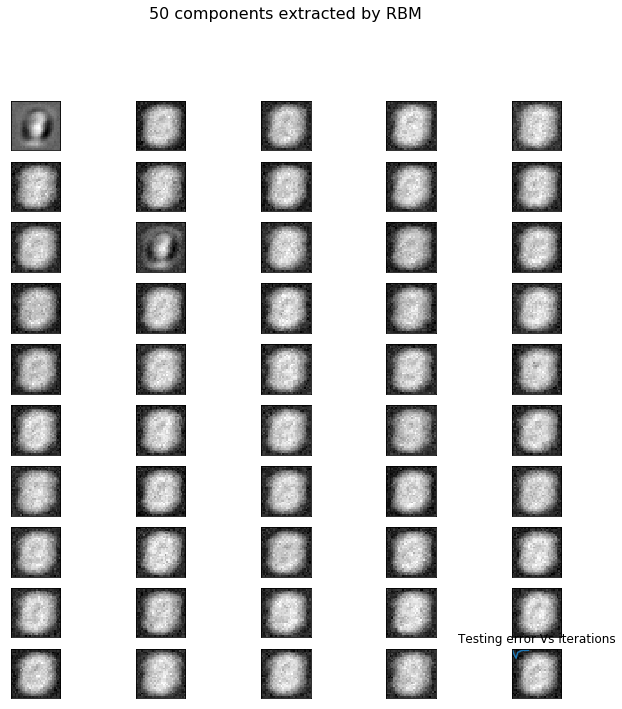

In [27]:
recon = report_RBM(hidden_dim = 75, learning_rate = 0.01)

finished iteration #1
finished iteration #2
finished iteration #3
finished iteration #4
finished iteration #5
finished iteration #6
finished iteration #7
finished iteration #8
finished iteration #9
finished iteration #10


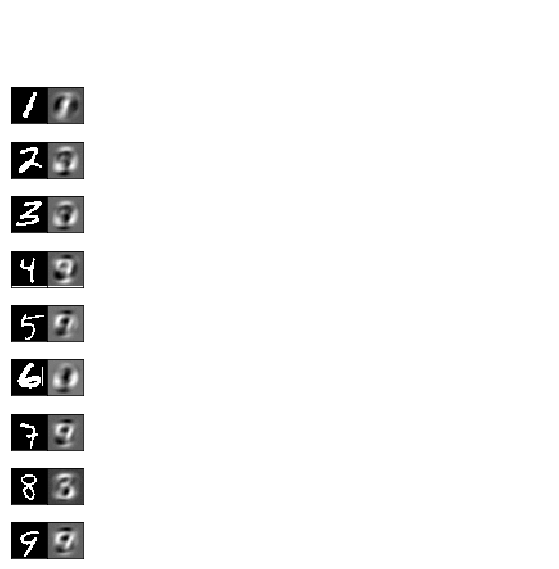

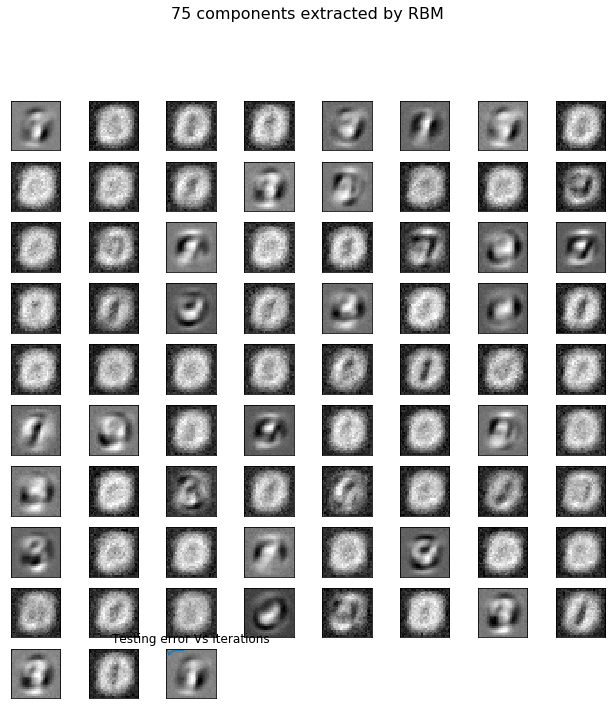

In [28]:
recon = report_RBM(hidden_dim = 100, learning_rate = 0.01)

finished iteration #1
finished iteration #2
finished iteration #3
finished iteration #4
finished iteration #5
finished iteration #6
finished iteration #7
finished iteration #8
finished iteration #9
finished iteration #10


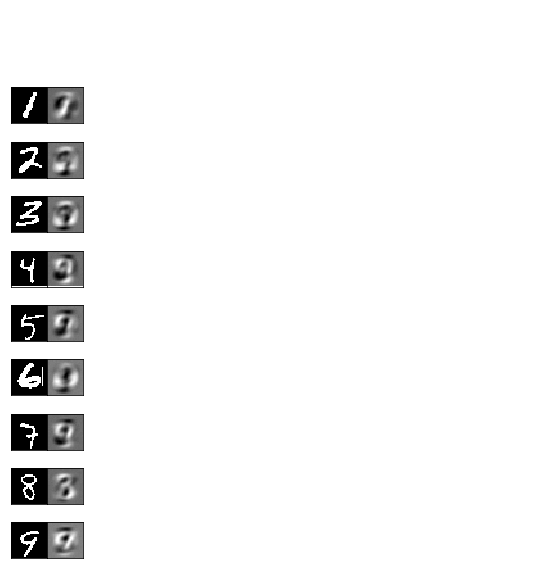

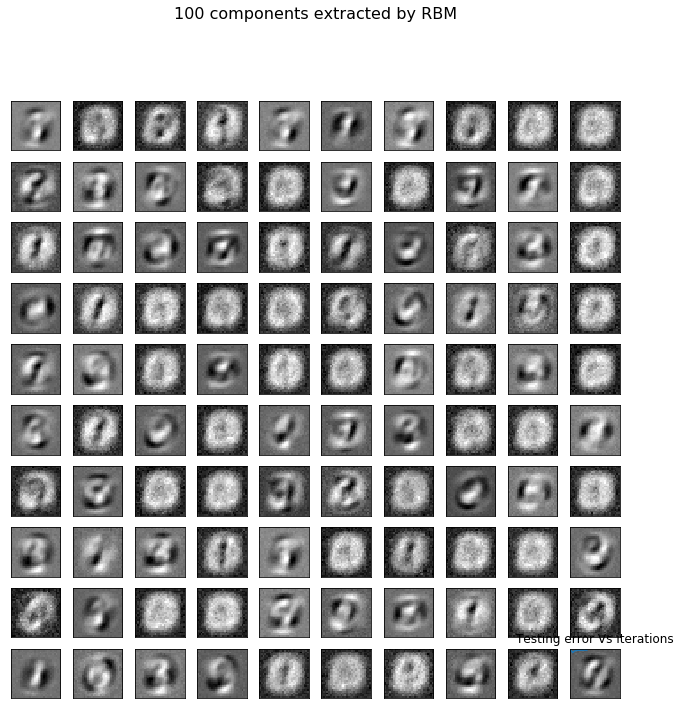

In [29]:
recon = report_RBM(hidden_dim = 150, learning_rate = 0.01)